# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

#helper.download_extract('mnist', data_dir)
#helper.download_extract('celeba', data_dir)

## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

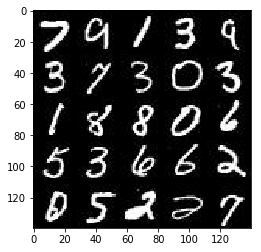

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

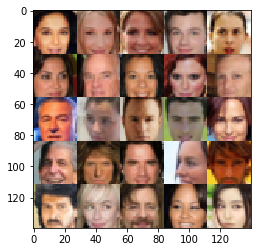

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
#TO test

    # TODO: Implement Function
    tensah = tf.placeholder(tf.float32, (None,image_width,image_height,image_channels),name='tensah') 
    zdata = tf.placeholder(tf.float32, (None,z_dim),name='zdata')
    learnrate = tf.placeholder(tf.float32, None, name="learnrate")
    return tensah, zdata, learnrate



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.02
    
    with tf.variable_scope('discriminator', reuse=reuse):
        #32x32x3
        l1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * l1, l1)
        
        # 16x16x32
        l2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        batchnorm = tf.layers.batch_normalization(l2, training=True)
        relu2 = tf.maximum(alpha * batchnorm, batchnorm)
        
        # 8x8x128
        l3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        batchnorm2 = tf.layers.batch_normalization(l3, training=True)
        relu3 = tf.maximum(alpha * batchnorm2, batchnorm2)
        

        # 4x4x256
        rs = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(rs, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.02
    
    with tf.variable_scope('generator', reuse=not(is_train)):
        layer1 = tf.layers.dense(z, 2*2*512, activation=None)

        layer1 = tf.reshape(layer1, (-1, 2, 2, 512))
        layer1 = tf.layers.batch_normalization(layer1, training=is_train)
        layer1 = tf.maximum(alpha * layer1, layer1)
        
        layer2 = tf.layers.conv2d_transpose(layer1, 256, 5, strides=2, padding='valid')
        layer2 = tf.layers.batch_normalization(layer2, training=is_train)
        layer2 = tf.maximum(alpha * layer2, layer2)
        
        layer3 = tf.layers.conv2d_transpose(layer2, 128, 5, strides=2, padding='same')
        layer3 = tf.layers.batch_normalization(layer3, training=is_train)
        layer3 = tf.maximum(alpha * layer3, layer3)

        logits = tf.layers.conv2d_transpose(layer3, out_channel_dim, 5, strides=2, padding='same')
        
        out = tf.tanh(logits)

        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    trainvars = tf.trainable_variables()
    disvars = [var for var in trainvars if var.name.startswith('discriminator')]
    genvars = [var for var in trainvars if var.name.startswith('generator')]
    all_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    g_update_ops = [var for var in all_update_ops if var.name.startswith('generator')]
    d_update_ops = [var for var in all_update_ops if var.name.startswith('discriminator')]

    with tf.control_dependencies(d_update_ops):
        d_train = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list = disvars)

    with tf.control_dependencies(g_update_ops):
        g_train = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list = genvars)

    return d_train, g_train


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr_placeholder = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    steps = 0
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epochs):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images = batch_images*2  #done per reviewer's suggestion         
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr_placeholder: learning_rate, input_real: batch_images})
                #run twice per reviewer's suggestion, yielded far better performance from the generator.
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr_placeholder: learning_rate, input_real: batch_images})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr_placeholder: learning_rate, input_real: batch_images})

                if steps % 25 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(e+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 1, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.3528... Generator Loss: 0.5764
Epoch 1/2... Discriminator Loss: 1.0524... Generator Loss: 0.7629
Epoch 1/2... Discriminator Loss: 1.0878... Generator Loss: 0.8210
Epoch 1/2... Discriminator Loss: 1.2632... Generator Loss: 0.7742


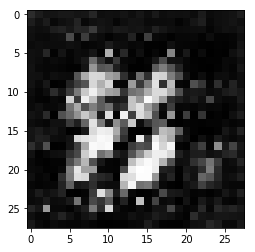

Epoch 1/2... Discriminator Loss: 1.0843... Generator Loss: 1.4665
Epoch 1/2... Discriminator Loss: 0.9377... Generator Loss: 1.0297
Epoch 1/2... Discriminator Loss: 1.8010... Generator Loss: 1.1509
Epoch 1/2... Discriminator Loss: 0.9369... Generator Loss: 0.7996


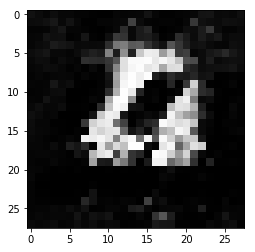

Epoch 1/2... Discriminator Loss: 1.1666... Generator Loss: 0.7392
Epoch 1/2... Discriminator Loss: 1.2810... Generator Loss: 0.8578
Epoch 1/2... Discriminator Loss: 0.7223... Generator Loss: 1.2399
Epoch 1/2... Discriminator Loss: 1.4760... Generator Loss: 1.0424


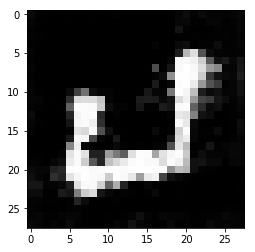

Epoch 1/2... Discriminator Loss: 1.1474... Generator Loss: 0.9479
Epoch 1/2... Discriminator Loss: 1.1475... Generator Loss: 1.0420
Epoch 1/2... Discriminator Loss: 1.1724... Generator Loss: 0.7568
Epoch 1/2... Discriminator Loss: 1.3681... Generator Loss: 0.7565


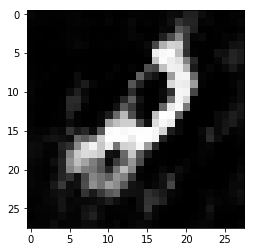

Epoch 1/2... Discriminator Loss: 1.3238... Generator Loss: 0.6453
Epoch 1/2... Discriminator Loss: 1.3886... Generator Loss: 0.9069
Epoch 1/2... Discriminator Loss: 1.1350... Generator Loss: 1.0642
Epoch 1/2... Discriminator Loss: 1.0778... Generator Loss: 1.1992


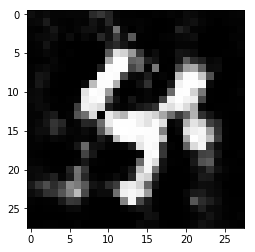

Epoch 1/2... Discriminator Loss: 0.9878... Generator Loss: 0.8783
Epoch 1/2... Discriminator Loss: 1.0345... Generator Loss: 0.7943
Epoch 1/2... Discriminator Loss: 1.2719... Generator Loss: 0.9960
Epoch 1/2... Discriminator Loss: 1.0044... Generator Loss: 0.8810


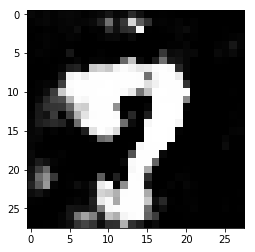

Epoch 1/2... Discriminator Loss: 0.7318... Generator Loss: 1.3292
Epoch 1/2... Discriminator Loss: 1.5520... Generator Loss: 0.6489
Epoch 1/2... Discriminator Loss: 1.0816... Generator Loss: 0.8617
Epoch 1/2... Discriminator Loss: 1.1999... Generator Loss: 0.9856


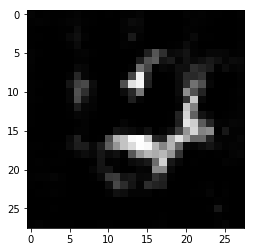

Epoch 1/2... Discriminator Loss: 0.4034... Generator Loss: 1.5951
Epoch 1/2... Discriminator Loss: 1.1460... Generator Loss: 1.3987
Epoch 1/2... Discriminator Loss: 1.4328... Generator Loss: 0.8750
Epoch 1/2... Discriminator Loss: 1.0240... Generator Loss: 0.9176


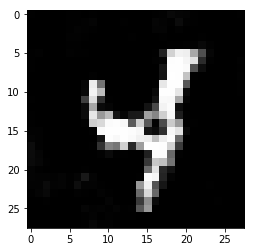

Epoch 1/2... Discriminator Loss: 1.1716... Generator Loss: 1.0360
Epoch 1/2... Discriminator Loss: 1.1291... Generator Loss: 0.7946
Epoch 1/2... Discriminator Loss: 0.7063... Generator Loss: 1.1427
Epoch 1/2... Discriminator Loss: 1.4549... Generator Loss: 0.5045


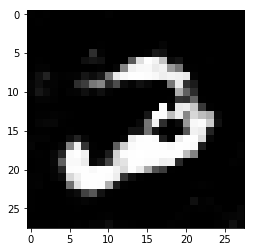

Epoch 1/2... Discriminator Loss: 1.1714... Generator Loss: 0.7515
Epoch 1/2... Discriminator Loss: 1.2792... Generator Loss: 1.0258
Epoch 1/2... Discriminator Loss: 1.1102... Generator Loss: 1.1713
Epoch 1/2... Discriminator Loss: 1.3984... Generator Loss: 0.7176


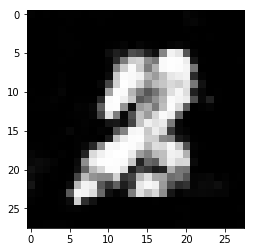

Epoch 1/2... Discriminator Loss: 1.6639... Generator Loss: 0.7214
Epoch 1/2... Discriminator Loss: 0.9255... Generator Loss: 0.9507
Epoch 1/2... Discriminator Loss: 1.4994... Generator Loss: 0.6489
Epoch 1/2... Discriminator Loss: 1.1346... Generator Loss: 0.8466


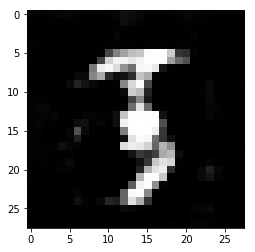

Epoch 1/2... Discriminator Loss: 1.3314... Generator Loss: 0.8024
Epoch 1/2... Discriminator Loss: 0.5967... Generator Loss: 1.7636
Epoch 1/2... Discriminator Loss: 0.8935... Generator Loss: 0.9569
Epoch 1/2... Discriminator Loss: 0.8871... Generator Loss: 1.0403


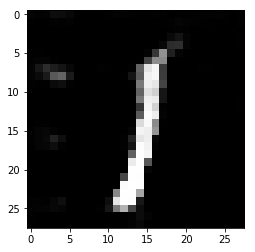

Epoch 1/2... Discriminator Loss: 1.0030... Generator Loss: 1.1420
Epoch 1/2... Discriminator Loss: 0.9941... Generator Loss: 0.9268
Epoch 1/2... Discriminator Loss: 0.9063... Generator Loss: 0.8617
Epoch 1/2... Discriminator Loss: 0.5136... Generator Loss: 1.6230


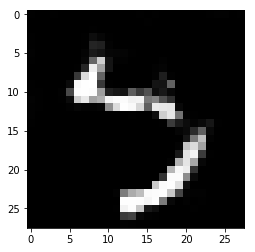

Epoch 1/2... Discriminator Loss: 1.6996... Generator Loss: 0.6092
Epoch 1/2... Discriminator Loss: 1.2802... Generator Loss: 0.5167
Epoch 1/2... Discriminator Loss: 0.7513... Generator Loss: 1.3892
Epoch 1/2... Discriminator Loss: 0.9960... Generator Loss: 0.8228


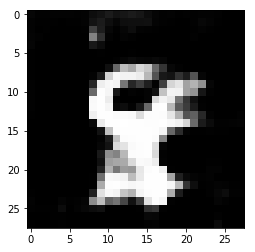

Epoch 1/2... Discriminator Loss: 0.7286... Generator Loss: 1.3102
Epoch 1/2... Discriminator Loss: 0.9223... Generator Loss: 0.8685
Epoch 1/2... Discriminator Loss: 0.8607... Generator Loss: 1.0650
Epoch 1/2... Discriminator Loss: 0.7137... Generator Loss: 2.0433


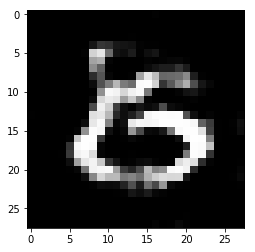

Epoch 1/2... Discriminator Loss: 0.6627... Generator Loss: 1.3879
Epoch 1/2... Discriminator Loss: 0.8438... Generator Loss: 1.1852
Epoch 1/2... Discriminator Loss: 1.0758... Generator Loss: 0.6203
Epoch 1/2... Discriminator Loss: 0.8346... Generator Loss: 1.5867


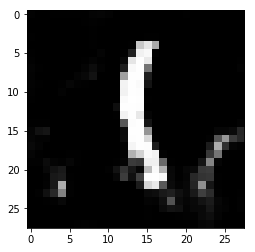

Epoch 1/2... Discriminator Loss: 0.8243... Generator Loss: 1.0449
Epoch 1/2... Discriminator Loss: 0.7918... Generator Loss: 0.9539
Epoch 1/2... Discriminator Loss: 1.0400... Generator Loss: 0.7561
Epoch 1/2... Discriminator Loss: 0.9913... Generator Loss: 0.9397


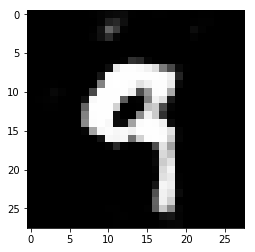

Epoch 1/2... Discriminator Loss: 0.8193... Generator Loss: 1.5298
Epoch 1/2... Discriminator Loss: 0.9526... Generator Loss: 0.9704
Epoch 1/2... Discriminator Loss: 0.8655... Generator Loss: 1.7048
Epoch 1/2... Discriminator Loss: 1.4720... Generator Loss: 0.5128


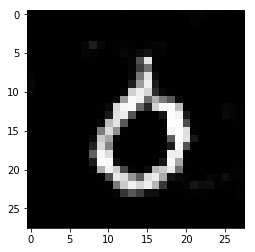

Epoch 1/2... Discriminator Loss: 0.9962... Generator Loss: 0.7802
Epoch 1/2... Discriminator Loss: 0.9353... Generator Loss: 0.8657
Epoch 1/2... Discriminator Loss: 0.9529... Generator Loss: 0.7837
Epoch 2/2... Discriminator Loss: 1.0207... Generator Loss: 1.4917


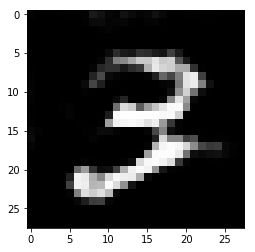

Epoch 2/2... Discriminator Loss: 0.8110... Generator Loss: 0.9475
Epoch 2/2... Discriminator Loss: 0.9601... Generator Loss: 1.1140
Epoch 2/2... Discriminator Loss: 0.8605... Generator Loss: 1.0942
Epoch 2/2... Discriminator Loss: 1.0860... Generator Loss: 0.5566


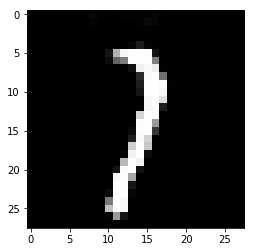

Epoch 2/2... Discriminator Loss: 0.7669... Generator Loss: 1.1908
Epoch 2/2... Discriminator Loss: 1.0398... Generator Loss: 0.7726
Epoch 2/2... Discriminator Loss: 1.4616... Generator Loss: 0.4001
Epoch 2/2... Discriminator Loss: 0.9569... Generator Loss: 1.0157


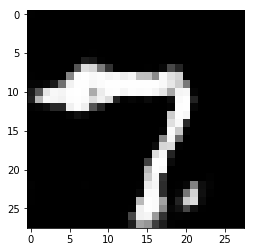

Epoch 2/2... Discriminator Loss: 0.7624... Generator Loss: 0.9196
Epoch 2/2... Discriminator Loss: 0.7002... Generator Loss: 1.1287
Epoch 2/2... Discriminator Loss: 0.8374... Generator Loss: 0.8436
Epoch 2/2... Discriminator Loss: 1.0512... Generator Loss: 0.7870


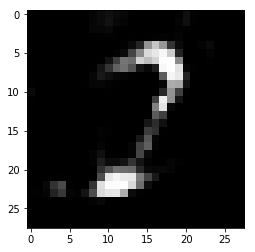

Epoch 2/2... Discriminator Loss: 0.6060... Generator Loss: 2.0309
Epoch 2/2... Discriminator Loss: 0.8579... Generator Loss: 0.7782
Epoch 2/2... Discriminator Loss: 1.3413... Generator Loss: 0.4835
Epoch 2/2... Discriminator Loss: 0.9070... Generator Loss: 0.9005


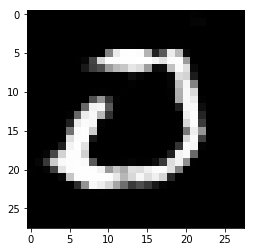

Epoch 2/2... Discriminator Loss: 1.1397... Generator Loss: 1.4523
Epoch 2/2... Discriminator Loss: 0.8391... Generator Loss: 0.8941
Epoch 2/2... Discriminator Loss: 0.8908... Generator Loss: 0.6972
Epoch 2/2... Discriminator Loss: 1.2843... Generator Loss: 0.5148


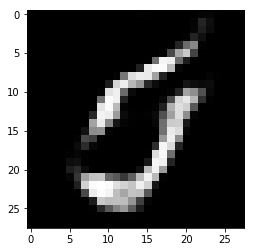

Epoch 2/2... Discriminator Loss: 0.6629... Generator Loss: 1.3444
Epoch 2/2... Discriminator Loss: 0.9656... Generator Loss: 0.7551
Epoch 2/2... Discriminator Loss: 0.4793... Generator Loss: 1.5994
Epoch 2/2... Discriminator Loss: 1.1423... Generator Loss: 1.1242


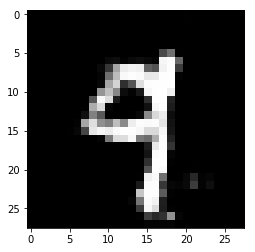

Epoch 2/2... Discriminator Loss: 1.5390... Generator Loss: 0.3163
Epoch 2/2... Discriminator Loss: 1.0550... Generator Loss: 0.6989
Epoch 2/2... Discriminator Loss: 1.1787... Generator Loss: 2.7234
Epoch 2/2... Discriminator Loss: 0.8439... Generator Loss: 1.0662


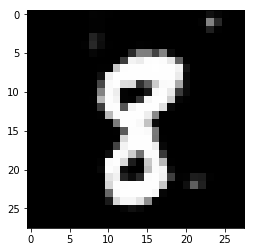

Epoch 2/2... Discriminator Loss: 1.1837... Generator Loss: 0.4958
Epoch 2/2... Discriminator Loss: 1.4124... Generator Loss: 0.4608
Epoch 2/2... Discriminator Loss: 0.8198... Generator Loss: 1.1532
Epoch 2/2... Discriminator Loss: 0.6533... Generator Loss: 0.9387


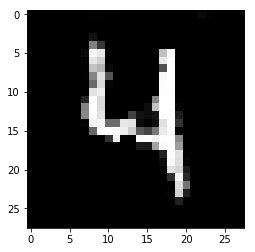

Epoch 2/2... Discriminator Loss: 1.0958... Generator Loss: 0.5888
Epoch 2/2... Discriminator Loss: 1.1249... Generator Loss: 0.5373
Epoch 2/2... Discriminator Loss: 1.2115... Generator Loss: 0.6714
Epoch 2/2... Discriminator Loss: 0.5184... Generator Loss: 1.8709


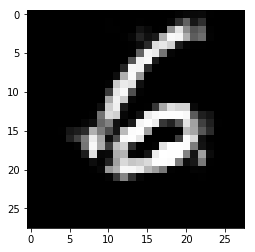

Epoch 2/2... Discriminator Loss: 0.4866... Generator Loss: 1.4885
Epoch 2/2... Discriminator Loss: 0.6833... Generator Loss: 1.3611
Epoch 2/2... Discriminator Loss: 1.2929... Generator Loss: 0.5319
Epoch 2/2... Discriminator Loss: 0.7381... Generator Loss: 1.3835


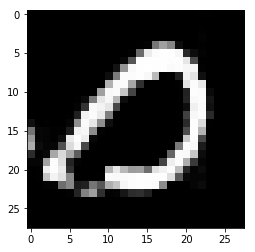

Epoch 2/2... Discriminator Loss: 0.8941... Generator Loss: 0.9106
Epoch 2/2... Discriminator Loss: 0.6975... Generator Loss: 0.9263
Epoch 2/2... Discriminator Loss: 0.9105... Generator Loss: 1.7640
Epoch 2/2... Discriminator Loss: 0.8659... Generator Loss: 0.9865


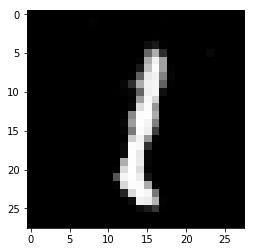

Epoch 2/2... Discriminator Loss: 0.7532... Generator Loss: 0.9392
Epoch 2/2... Discriminator Loss: 1.7551... Generator Loss: 0.2561
Epoch 2/2... Discriminator Loss: 0.5950... Generator Loss: 2.9469
Epoch 2/2... Discriminator Loss: 0.2606... Generator Loss: 2.0333


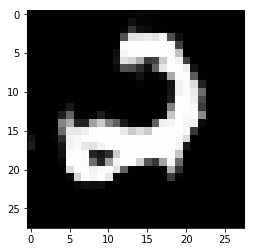

Epoch 2/2... Discriminator Loss: 0.6983... Generator Loss: 1.1007
Epoch 2/2... Discriminator Loss: 1.2602... Generator Loss: 0.5009
Epoch 2/2... Discriminator Loss: 0.6169... Generator Loss: 2.0616
Epoch 2/2... Discriminator Loss: 0.8950... Generator Loss: 0.7931


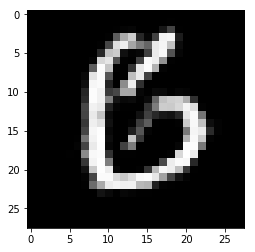

Epoch 2/2... Discriminator Loss: 1.3751... Generator Loss: 0.3610
Epoch 2/2... Discriminator Loss: 1.1292... Generator Loss: 0.6331
Epoch 2/2... Discriminator Loss: 0.7920... Generator Loss: 0.9114
Epoch 2/2... Discriminator Loss: 0.5935... Generator Loss: 1.7054


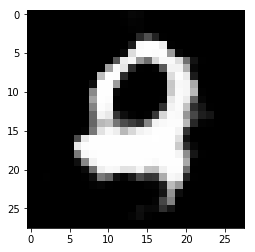

Epoch 2/2... Discriminator Loss: 1.4089... Generator Loss: 0.4084
Epoch 2/2... Discriminator Loss: 0.8259... Generator Loss: 2.3244
Epoch 2/2... Discriminator Loss: 0.9377... Generator Loss: 0.6847
Epoch 2/2... Discriminator Loss: 0.6523... Generator Loss: 1.0780


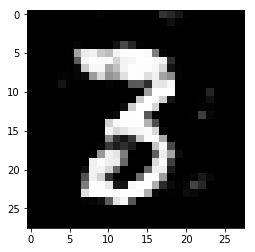

Epoch 2/2... Discriminator Loss: 0.4789... Generator Loss: 2.3030
Epoch 2/2... Discriminator Loss: 0.8504... Generator Loss: 0.8198
Epoch 2/2... Discriminator Loss: 0.7559... Generator Loss: 0.7883
Epoch 2/2... Discriminator Loss: 1.1286... Generator Loss: 1.2559


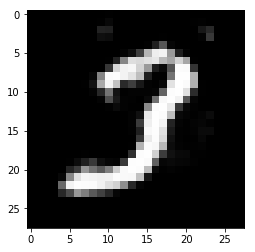

Epoch 2/2... Discriminator Loss: 0.5841... Generator Loss: 1.7617
Epoch 2/2... Discriminator Loss: 1.0456... Generator Loss: 0.6422
Epoch 2/2... Discriminator Loss: 0.5209... Generator Loss: 1.4839


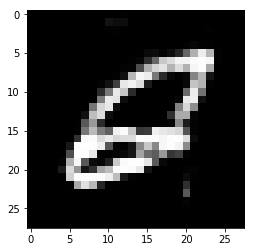

Epoch 2/2... Discriminator Loss: 0.3771... Generator Loss: 2.6247
Epoch 2/2... Discriminator Loss: 0.6243... Generator Loss: 1.0486
Epoch 2/2... Discriminator Loss: 0.7896... Generator Loss: 0.8125
Epoch 2/2... Discriminator Loss: 0.2358... Generator Loss: 2.5346


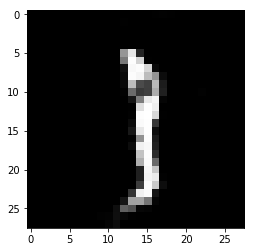

Epoch 2/2... Discriminator Loss: 0.4932... Generator Loss: 1.2374
Epoch 2/2... Discriminator Loss: 0.4354... Generator Loss: 1.4138


In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 4.0548... Generator Loss: 0.2174
Epoch 1/1... Discriminator Loss: 2.9083... Generator Loss: 0.3463
Epoch 1/1... Discriminator Loss: 1.2386... Generator Loss: 1.0689
Epoch 1/1... Discriminator Loss: 1.2536... Generator Loss: 0.6049


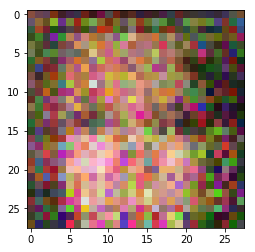

Epoch 1/1... Discriminator Loss: 0.8160... Generator Loss: 1.2091
Epoch 1/1... Discriminator Loss: 0.8933... Generator Loss: 1.1382
Epoch 1/1... Discriminator Loss: 1.8357... Generator Loss: 0.5330
Epoch 1/1... Discriminator Loss: 1.7556... Generator Loss: 0.5342


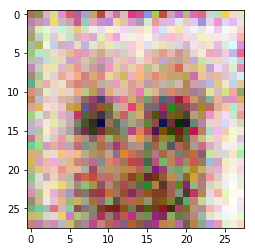

Epoch 1/1... Discriminator Loss: 1.6642... Generator Loss: 0.5026
Epoch 1/1... Discriminator Loss: 1.4004... Generator Loss: 0.6791
Epoch 1/1... Discriminator Loss: 1.4787... Generator Loss: 0.5891
Epoch 1/1... Discriminator Loss: 1.4414... Generator Loss: 0.6785


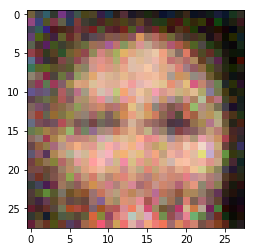

Epoch 1/1... Discriminator Loss: 1.5994... Generator Loss: 0.6151
Epoch 1/1... Discriminator Loss: 1.6056... Generator Loss: 0.6379
Epoch 1/1... Discriminator Loss: 1.6953... Generator Loss: 0.5567
Epoch 1/1... Discriminator Loss: 1.4776... Generator Loss: 0.6109


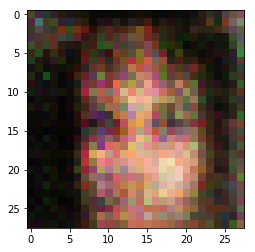

Epoch 1/1... Discriminator Loss: 1.5324... Generator Loss: 0.6393
Epoch 1/1... Discriminator Loss: 1.4584... Generator Loss: 0.7341
Epoch 1/1... Discriminator Loss: 1.4892... Generator Loss: 0.6234
Epoch 1/1... Discriminator Loss: 1.5596... Generator Loss: 0.6580


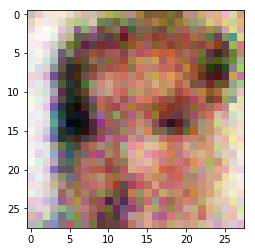

Epoch 1/1... Discriminator Loss: 1.4816... Generator Loss: 0.6419
Epoch 1/1... Discriminator Loss: 1.5693... Generator Loss: 0.5929
Epoch 1/1... Discriminator Loss: 1.5472... Generator Loss: 0.6365
Epoch 1/1... Discriminator Loss: 1.4179... Generator Loss: 0.6840


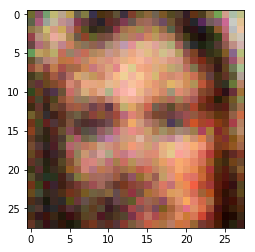

Epoch 1/1... Discriminator Loss: 1.5035... Generator Loss: 0.6543
Epoch 1/1... Discriminator Loss: 1.5037... Generator Loss: 0.6140
Epoch 1/1... Discriminator Loss: 1.5415... Generator Loss: 0.5972
Epoch 1/1... Discriminator Loss: 1.5161... Generator Loss: 0.6097


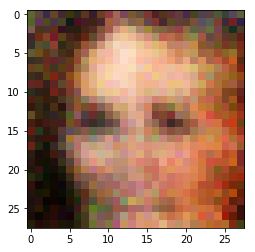

Epoch 1/1... Discriminator Loss: 1.5498... Generator Loss: 0.5919
Epoch 1/1... Discriminator Loss: 1.4708... Generator Loss: 0.6182
Epoch 1/1... Discriminator Loss: 1.5196... Generator Loss: 0.5999
Epoch 1/1... Discriminator Loss: 1.4871... Generator Loss: 0.6324


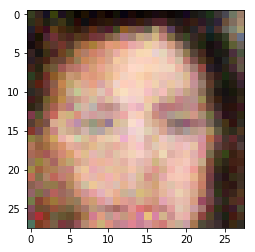

Epoch 1/1... Discriminator Loss: 1.4677... Generator Loss: 0.6726
Epoch 1/1... Discriminator Loss: 1.4998... Generator Loss: 0.6192
Epoch 1/1... Discriminator Loss: 1.4741... Generator Loss: 0.6317
Epoch 1/1... Discriminator Loss: 1.4776... Generator Loss: 0.6337


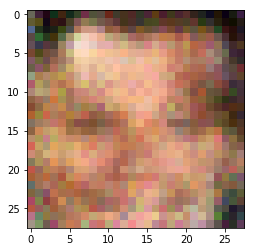

Epoch 1/1... Discriminator Loss: 1.4804... Generator Loss: 0.6630
Epoch 1/1... Discriminator Loss: 1.5001... Generator Loss: 0.6608
Epoch 1/1... Discriminator Loss: 1.4717... Generator Loss: 0.6473
Epoch 1/1... Discriminator Loss: 1.5265... Generator Loss: 0.6198


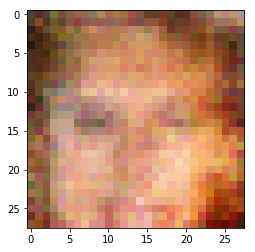

Epoch 1/1... Discriminator Loss: 1.4822... Generator Loss: 0.6397
Epoch 1/1... Discriminator Loss: 1.4514... Generator Loss: 0.6494
Epoch 1/1... Discriminator Loss: 1.4551... Generator Loss: 0.6747
Epoch 1/1... Discriminator Loss: 1.4731... Generator Loss: 0.6620


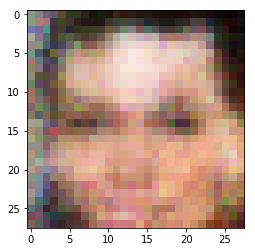

Epoch 1/1... Discriminator Loss: 1.4723... Generator Loss: 0.6485
Epoch 1/1... Discriminator Loss: 1.4937... Generator Loss: 0.6161
Epoch 1/1... Discriminator Loss: 1.4526... Generator Loss: 0.6712
Epoch 1/1... Discriminator Loss: 1.4585... Generator Loss: 0.6423


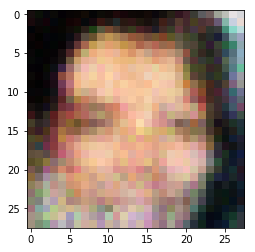

Epoch 1/1... Discriminator Loss: 1.4851... Generator Loss: 0.6538
Epoch 1/1... Discriminator Loss: 1.4083... Generator Loss: 0.6938
Epoch 1/1... Discriminator Loss: 1.4988... Generator Loss: 0.6189
Epoch 1/1... Discriminator Loss: 1.4590... Generator Loss: 0.6499


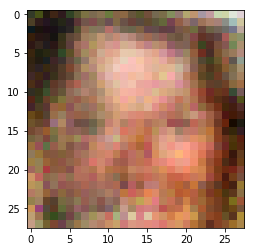

Epoch 1/1... Discriminator Loss: 1.4517... Generator Loss: 0.6165
Epoch 1/1... Discriminator Loss: 1.4607... Generator Loss: 0.6976
Epoch 1/1... Discriminator Loss: 1.4738... Generator Loss: 0.6312
Epoch 1/1... Discriminator Loss: 1.4517... Generator Loss: 0.6462


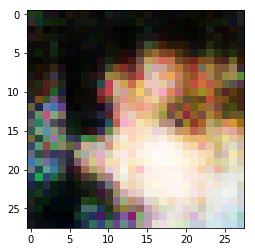

Epoch 1/1... Discriminator Loss: 1.4459... Generator Loss: 0.6682
Epoch 1/1... Discriminator Loss: 1.4555... Generator Loss: 0.6596
Epoch 1/1... Discriminator Loss: 1.4399... Generator Loss: 0.6367
Epoch 1/1... Discriminator Loss: 1.4398... Generator Loss: 0.6833


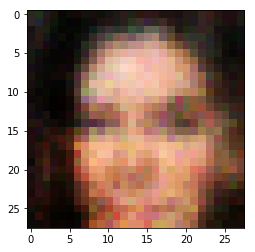

Epoch 1/1... Discriminator Loss: 1.4466... Generator Loss: 0.6621
Epoch 1/1... Discriminator Loss: 1.4945... Generator Loss: 0.6276
Epoch 1/1... Discriminator Loss: 1.4396... Generator Loss: 0.6742
Epoch 1/1... Discriminator Loss: 1.4867... Generator Loss: 0.6224


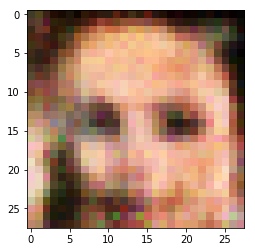

Epoch 1/1... Discriminator Loss: 1.4534... Generator Loss: 0.6037
Epoch 1/1... Discriminator Loss: 1.4271... Generator Loss: 0.6628
Epoch 1/1... Discriminator Loss: 1.4448... Generator Loss: 0.6764
Epoch 1/1... Discriminator Loss: 1.4535... Generator Loss: 0.6375


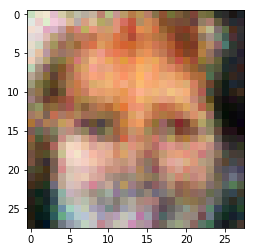

Epoch 1/1... Discriminator Loss: 1.4464... Generator Loss: 0.6646
Epoch 1/1... Discriminator Loss: 1.4497... Generator Loss: 0.6730
Epoch 1/1... Discriminator Loss: 1.4315... Generator Loss: 0.6870
Epoch 1/1... Discriminator Loss: 1.4450... Generator Loss: 0.6390


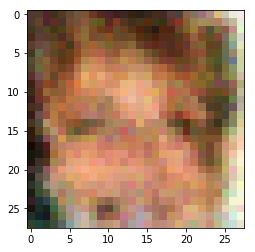

Epoch 1/1... Discriminator Loss: 1.4576... Generator Loss: 0.6342
Epoch 1/1... Discriminator Loss: 1.4387... Generator Loss: 0.6733
Epoch 1/1... Discriminator Loss: 1.4531... Generator Loss: 0.6744
Epoch 1/1... Discriminator Loss: 1.4376... Generator Loss: 0.6413


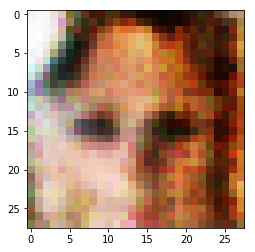

Epoch 1/1... Discriminator Loss: 1.4038... Generator Loss: 0.6799
Epoch 1/1... Discriminator Loss: 1.4414... Generator Loss: 0.6510
Epoch 1/1... Discriminator Loss: 1.4333... Generator Loss: 0.6563
Epoch 1/1... Discriminator Loss: 1.4234... Generator Loss: 0.6832


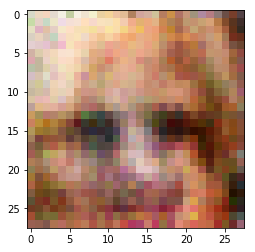

Epoch 1/1... Discriminator Loss: 1.4417... Generator Loss: 0.6797
Epoch 1/1... Discriminator Loss: 1.4454... Generator Loss: 0.6512
Epoch 1/1... Discriminator Loss: 1.4221... Generator Loss: 0.7197
Epoch 1/1... Discriminator Loss: 1.4485... Generator Loss: 0.6594


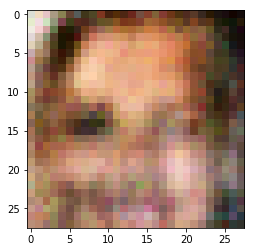

Epoch 1/1... Discriminator Loss: 1.4102... Generator Loss: 0.6492
Epoch 1/1... Discriminator Loss: 1.4177... Generator Loss: 0.6667
Epoch 1/1... Discriminator Loss: 1.4111... Generator Loss: 0.6596
Epoch 1/1... Discriminator Loss: 1.4364... Generator Loss: 0.6689


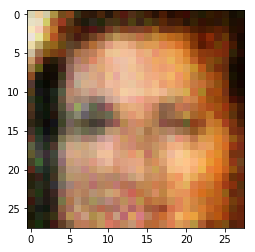

Epoch 1/1... Discriminator Loss: 1.4505... Generator Loss: 0.6871
Epoch 1/1... Discriminator Loss: 1.4423... Generator Loss: 0.6634
Epoch 1/1... Discriminator Loss: 1.4482... Generator Loss: 0.6289
Epoch 1/1... Discriminator Loss: 1.4228... Generator Loss: 0.6543


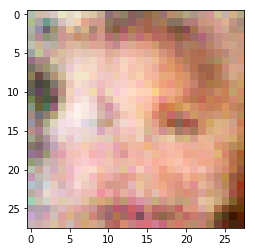

Epoch 1/1... Discriminator Loss: 1.4189... Generator Loss: 0.6664
Epoch 1/1... Discriminator Loss: 1.4430... Generator Loss: 0.6391
Epoch 1/1... Discriminator Loss: 1.4219... Generator Loss: 0.6641
Epoch 1/1... Discriminator Loss: 1.4543... Generator Loss: 0.6546


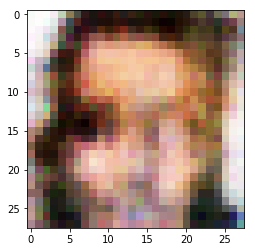

Epoch 1/1... Discriminator Loss: 1.4186... Generator Loss: 0.6681
Epoch 1/1... Discriminator Loss: 1.4292... Generator Loss: 0.6586
Epoch 1/1... Discriminator Loss: 1.4233... Generator Loss: 0.6589
Epoch 1/1... Discriminator Loss: 1.4369... Generator Loss: 0.6682


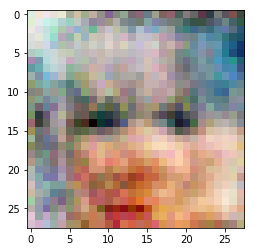

Epoch 1/1... Discriminator Loss: 1.4441... Generator Loss: 0.6476


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.